<a href="https://colab.research.google.com/github/BongSeongEun/AI-Study/blob/main/Machine_Learning_with_Python_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [2]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 코랩에서 넘파이 경고를 나타내지 않기 위해
import sys
if 'google.colab' in sys.modules:
    import warnings
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [3]:
import numpy as np
ar=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
type(ar)

numpy.ndarray

In [5]:
import numpy as np
x=np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n", x)

x:
 [[1 2 3]
 [4 5 6]]


In [6]:
from scipy import sparse
eye=np.eye(4)
print ("numpy 배열:\n", eye)

numpy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
sparse_matrix=sparse.csr_matrix(eye)
print("\nscipy의 CSR행렬:\n", sparse_matrix)


scipy의 CSR행렬:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [8]:
data=np.ones(4)
row_indices=np.arange(4)
col_indices=np.arange(4)
eye_coo=sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO표현:\n",eye_coo)

COO표현:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


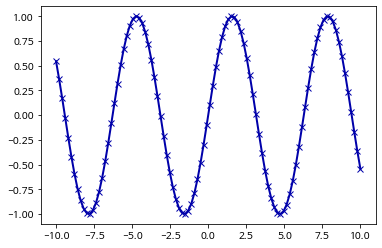

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
x=np.linspace(-10, 10, 100)
y=np.sin(x)
plt.plot(x, y, marker="x")

In [10]:
import pandas as pd
data={'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }
data_pandas=pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [11]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [12]:
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [14]:
print("타깃의 이름:\n", iris_dataset['target_names'])

타깃의 이름:
 ['setosa' 'versicolor' 'virginica']


In [15]:
print("특성의 이름:\n", iris_dataset['feature_names'])

특성의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [17]:
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [18]:
print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("target의 타입:", type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [20]:
print("target의 크기:", iris_dataset['target'].shape)

target의 크기: (150,)


In [21]:
print("타깃:\n", iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test=train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [23]:
print("X_train 크기:", X_train.shape)
print("y_train크기:", y_train.shape)

X_train 크기: (112, 4)
y_train크기: (112,)


In [24]:
print("X_test 크기:", X_test.shape)
print("y_test 크기:", Y_test.shape)

X_test 크기: (38, 4)
y_test 크기: (38,)


In [25]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f376f2b0cd0>,
      dtype=object)

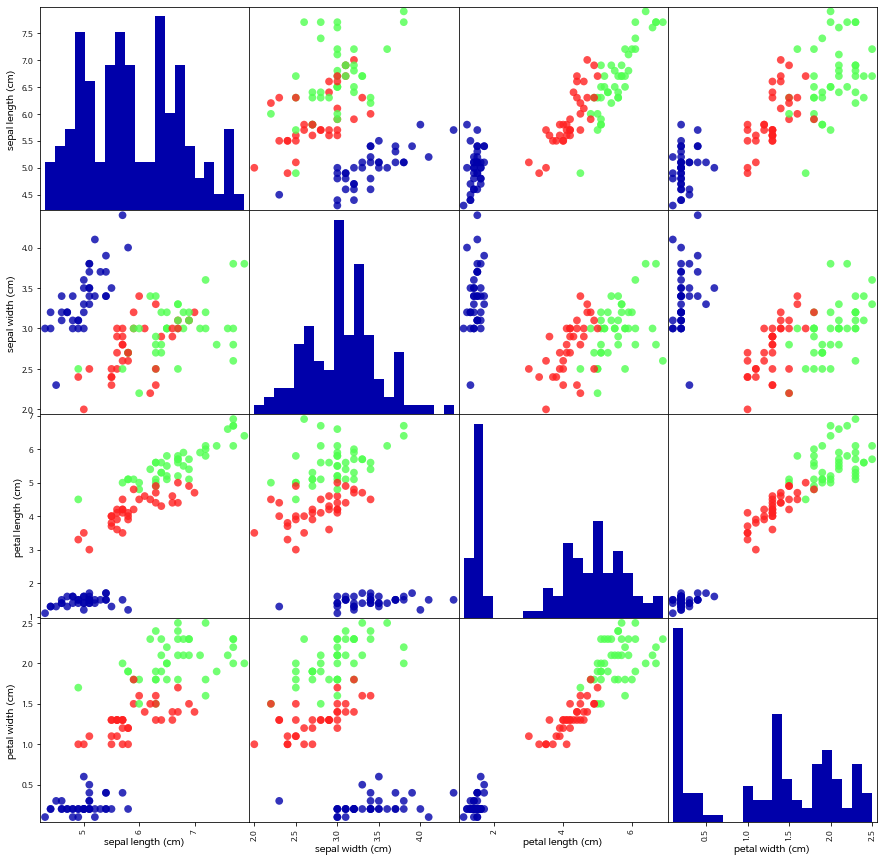

In [26]:
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = mglearn.cm3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train, y_train)
#스터디원들한테 물어보기

KNeighborsClassifier(n_neighbors=1)

In [29]:
X_new=np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [30]:
prediction=knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃의 이름:", 
      iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [31]:
y_pred=knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==Y_test)))

테스트 세트의 정확도: 0.97


# **Chap2 지도학습**
# 2.1 분류와 회귀
지도학습에는 분류와 회귀가 있다. 분류는 미리 정의된, 여러 클래스 레이블 중 하나를 예측하는 것으로 두 개의 클래스로 분류하는 이진 분류와 셋 이상의 클래스로 분류하는 다중 분류로 나뉜다. 

# 2.2 일반화, 과대적합, 과소적합

> 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 한다. 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 과대적합이라고 한다. 반대로 모델이 너무 간단하면, 데이터의 면면과 다양성을 잡아내지 못하고 훈련세트에도 잘 맞지 않을 것인데, 이를 과소적합이라고 한다. 






# 2.2.1 모델 복잡도와 데이터셋 크기의 관계
> 모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다. 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.



# 2.3 지도학습 알고리즘


# 2.3.1 예제에 사용할 데이터셋

X.shape: (26, 2)


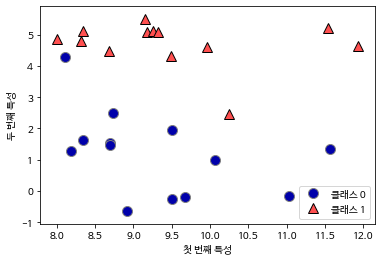

In [33]:
X, y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타깃')

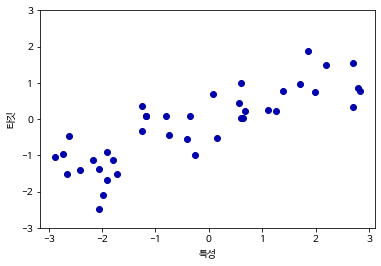

In [34]:
X, y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [35]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
#scikit-learn에 있는 데이터 불러오기

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [36]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [37]:
print("클래스별 상품 개수:\n", 
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 상품 개수:
 {'malignant': 212, 'benign': 357}


In [38]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [39]:
from sklearn.datasets import load_boston
boston=load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [40]:
X, y=mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# 2.3.2 최근접 이웃


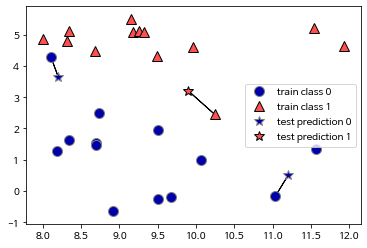

In [41]:
#k-최근접 이웃 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

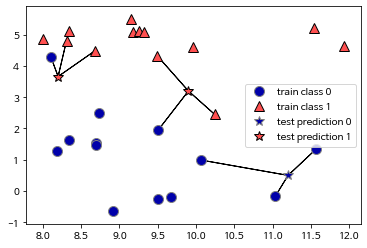

In [42]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [43]:
from sklearn.model_selection import train_test_split
X, y=mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [45]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


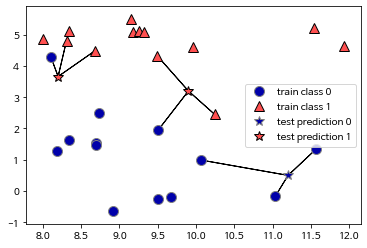

In [47]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [48]:
from sklearn.model_selection import train_test_split
X, y=mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [50]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [52]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


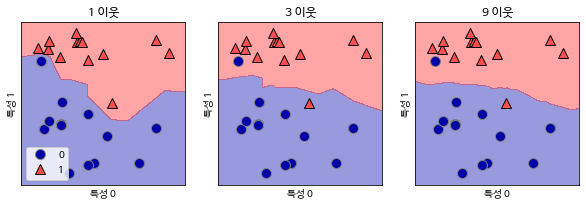

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

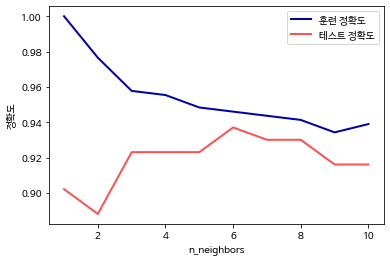

In [54]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

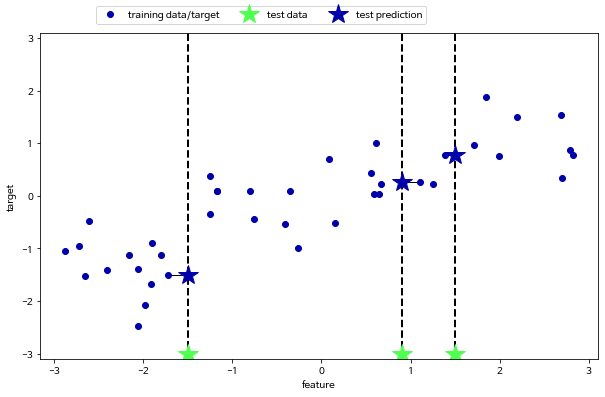

In [55]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

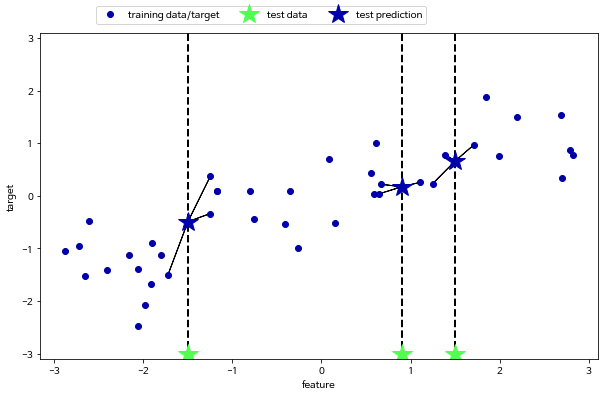

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [57]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [59]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


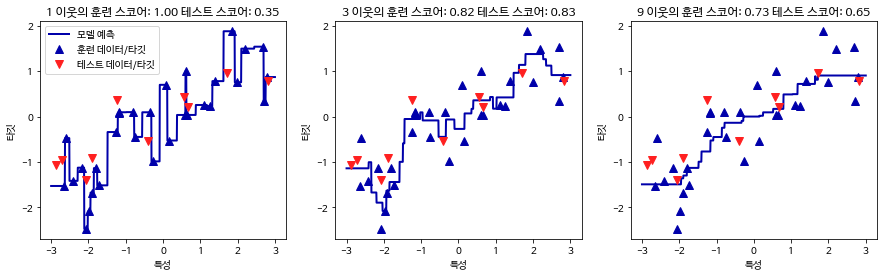

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

# 2.3.3 선형 모델
선형모델은 입력 특성에 대한 선형함수를 만들어 예측한다.

w[0]: 0.393906  b: -0.031804


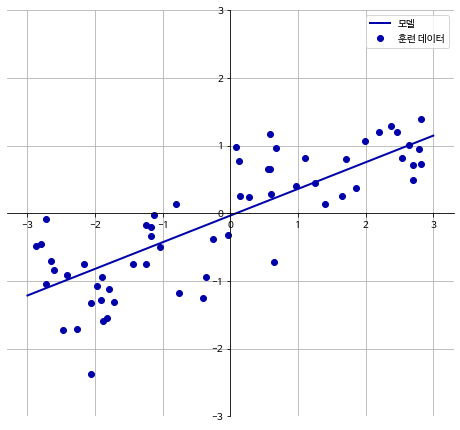

In [61]:
mglearn.plots.plot_linear_regression_wave()

특성이 많은 데이터셋이라면 선형모델은 매우 훌륭한 성능을 낼 수 있다. 특히 훈련데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련 세트에 대해서) 선형함수로 모델링할 수 있다. 회귀를 위한 선형 모델은 다양하고 이 모델들은 훈련 데이터로부터 모델 파람터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 난다. 

## 선형 회귀
선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘으로 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것)를 최소화하는 파라미터 w와 b를 찾는다. 선형회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없음.

In [62]:
from sklearn.linear_model import LinearRegression
X, y=mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

lr=LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr객체의 coef_속성에 저장되어있고 편향 또는 절편 파라미터는 intercept_속성에 저장되어 있다.

In [63]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
#coef_와 intercept_ 뒤의 밑줄은 scikit-learn의 훈련데이터에서 유도된 속성의 끝에 붙이는 것으로, 그 이유는 사용자가 지정한 매개변수와 구분하기 위해서이다.

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [64]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))
#R^2의 값이 그리 좋은 결과는 아니지만 훈련 세트와 테스트 세트의 점수가 매우 비슷한 것으로 보아, 이는 과대적합이 아니라 과소적합인 상태를 의미한다.
#1차원 데이터셋에서는 모델이 매우 단순하기 때문에 과대적합을 걱정할 필요가 없지만 특성이 많은 고차원데이처셋에서는 선형모델의 성능이 매우 높아져 과대적합될 가능성이 높다.


훈련 세트 점수:0.67
테스트 세트 점수:0.66


In [65]:
X, y=mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)
lr=LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [66]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## 리지 회귀
리지회귀에서의 가중치 선택은 훈련데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미호 리지회귀에 사용하는 규제 방식을 L2규제라고 한다. 

In [67]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련세트점수: 0.89
테스트 세트 점수: 0.75


In [68]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련세트점수: 0.79
테스트 세트 점수: 0.64


In [69]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련세트점수: 0.93
테스트 세트 점수: 0.77


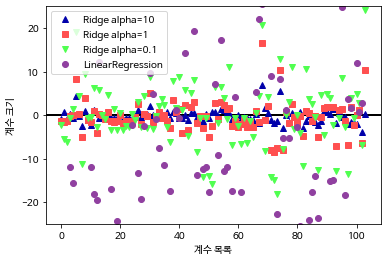

In [70]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

데이터셋의 크기에 따른 모델의 성능변화를 나타낸 그래프는 학습곡선이다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

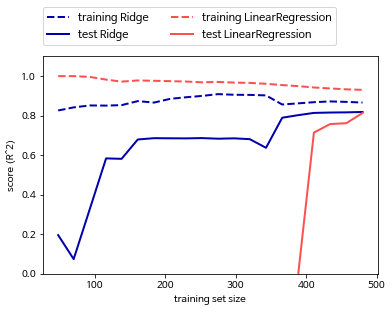

In [71]:
mglearn.plots.plot_ridge_n_samples()

## 라소

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [73]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [74]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

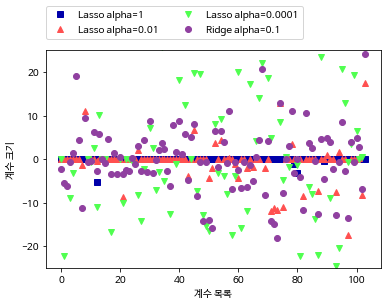

In [75]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

## 분류용 선형 모델
선형 모델을 학습시키는 방법
1.   -특정계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정
2.   -사용할 수 있는 규제가 있는지, 있다면 어떤방식인지

널리 알려진 두개의 선형 분류 알고리즘
1. 로지스틱회귀
2. 서포트 벡터 머신

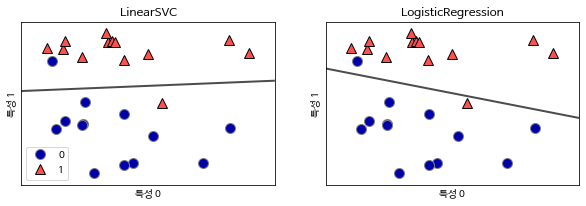

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

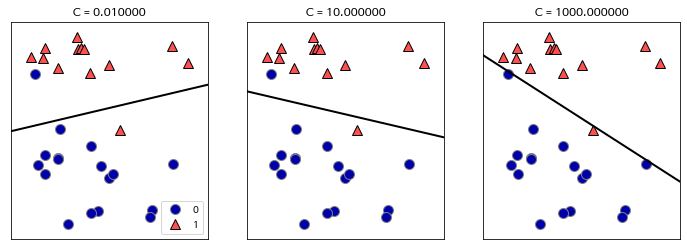

In [77]:
mglearn.plots.plot_linear_svc_regularization()

In [78]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [79]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [80]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


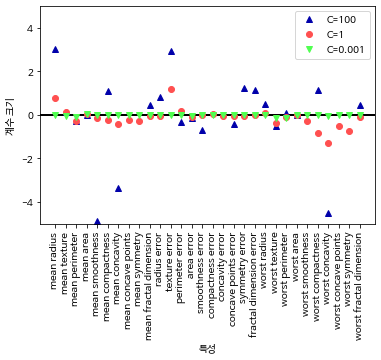

In [81]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


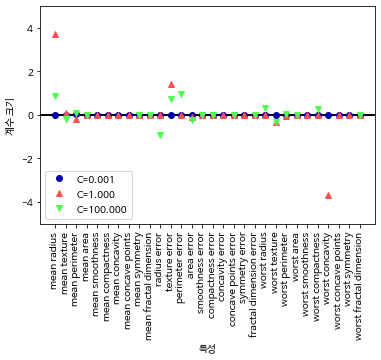

In [82]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

# 다중 클래스 분류용 선형 모델

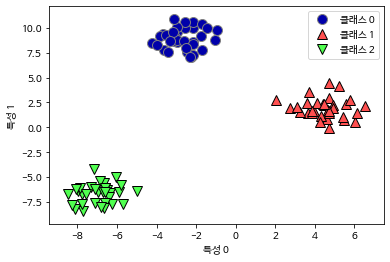

In [83]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)#분류용 가상 데이터 생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [84]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


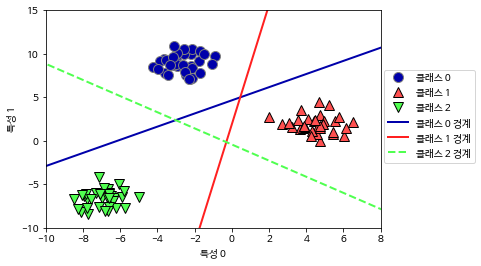

In [85]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

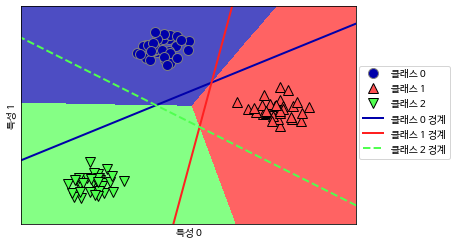

In [86]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 장단점과 매개변수
선형모델에서 주요 매개변수는 회귀모델에서는 alpha였고 linearSVC와 logisticregression에서는 C이다. alpha값이 클수록, C값이 낮을수록 모델이 단순해진다. 

# 2.3.4 나이브 베이즈 분류기
선형분류기보다 훈련속도는 빠르지만 일반화 성능이 조금 떨어짐.

In [87]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [88]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
